# Exploratory Data Analysis (EDA)

In this notebok, we perform an Exploratory Data Analysis (EDA) on the dataset used for **Facial Recognition** and **Object Recognition** models. The goal of EDA is to understand the structure, patterns, and relationships within the data, which helps in selecting appropriate models and preprocessing techniques.

## 1. Data Overview

The dataset consists of:
- **Facial Recognition Data**: A collection of labeled face images, used to recognize different individuals.
- **Object Recognition Data**: A set of images containing multiple objects with bounding boxes and labels for classification.

### Dataset Details:
- Number of images: `202,599`
- Number of classes (for object detection and facial recognition): `10,177`
- Image resolution: `178 x 218`
- Data format: `.jpg`

In [1]:
# Import Statements
import pandas as pd
import numpy as np
import cv2    
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set variables 
main_folder = '/mnt/c/users/efazh/DataCapstone/'
images_folder = main_folder + 'img_align_celeba/img_align_celeba/'

EXAMPLE_PIC = images_folder + '000506.jpg'

TRAINING_SAMPLES = 10000
VALIDATION_SAMPLES = 2000
TEST_SAMPLES = 2000
IMG_WIDTH = 178
IMG_HEIGHT = 218

In [3]:
# import the data set that include the attribute for each picture
df_attr = pd.read_csv(main_folder + 'list_attr_celeba.csv')
df_attr.set_index('image_id', inplace=True)
df_attr.replace(to_replace=-1, value=0, inplace=True) #replace -1 by 0
df_attr.shape

(202599, 40)

In [4]:
# List of available attributes
for i, j in enumerate(df_attr.columns):
    print(i, j)

0 5_o_Clock_Shadow
1 Arched_Eyebrows
2 Attractive
3 Bags_Under_Eyes
4 Bald
5 Bangs
6 Big_Lips
7 Big_Nose
8 Black_Hair
9 Blond_Hair
10 Blurry
11 Brown_Hair
12 Bushy_Eyebrows
13 Chubby
14 Double_Chin
15 Eyeglasses
16 Goatee
17 Gray_Hair
18 Heavy_Makeup
19 High_Cheekbones
20 Male
21 Mouth_Slightly_Open
22 Mustache
23 Narrow_Eyes
24 No_Beard
25 Oval_Face
26 Pale_Skin
27 Pointy_Nose
28 Receding_Hairline
29 Rosy_Cheeks
30 Sideburns
31 Smiling
32 Straight_Hair
33 Wavy_Hair
34 Wearing_Earrings
35 Wearing_Hat
36 Wearing_Lipstick
37 Wearing_Necklace
38 Wearing_Necktie
39 Young


## 2. Image Examples

To understand the variety of the dataset, let’s visualize a few random examples of:
- **Facial images**: Display different faces across various lighting conditions and angles.
- **Object images**: Show examples with multiple objects in a single image.

This helps to spot any anomalies or inconsistencies in image quality and labeling.

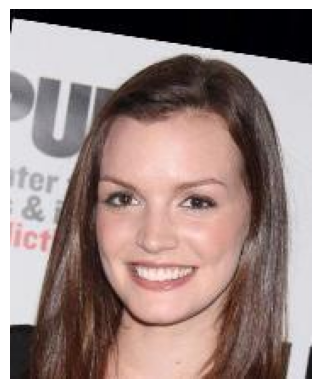

In [5]:
image = cv2.imread(EXAMPLE_PIC)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

## 3. Image Dimensions

Check the size of the images to understand if they need resizing or preprocessing. Uniform image dimensions can help improve model performance.

- Are the images of varying resolutions?
- Do we need to standardize the image sizes before feeding them into the model?

In [6]:
# Load a sample image
image = cv2.imread(EXAMPLE_PIC)

# Get image dimensions
height, width, _ = image.shape
print(f"Image Dimensions: Width = {width}, Height = {height}")

Image Dimensions: Width = 178, Height = 218


In [7]:
total_images = 209559
sample_size = 20

In [8]:
import os

# Get all image files in the directory
image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg')]

# Check if there are at least 20 images
if len(image_files) < sample_size:
    raise ValueError("Not enough images in the directory to sample 20 images.")

# Randomly sample 20 images
sampled_files = np.random.choice(image_files, size=sample_size, replace=False)

In [9]:
# Load and process sampled images
sampled_images = []
for image_file in sampled_files:
    # Load the image
    image_path = os.path.join(images_folder, image_file)
    image = cv2.imread(image_path)

    # Optionally, perform any preprocessing on the image
    # e.g., resize, normalize, etc.
    sampled_images.append(image)

print(f"Loaded {len(sampled_images)} images.")


Loaded 20 images.


In [10]:
# List to store image dimensions
image_dimensions = []

# Load and check dimensions of each sampled image
for image_file in sampled_files:
    # Load the image
    image_path = os.path.join(images_folder, image_file)
    image = cv2.imread(image_path)

    # Get image dimensions
    height, width, _ = image.shape
    image_dimensions.append((image_file, width, height))

# Print dimensions of each image
for image_file, width, height in image_dimensions:
    print(f"Image: {image_file}, Width: {width}, Height: {height}")


Image: 144041.jpg, Width: 178, Height: 218
Image: 153966.jpg, Width: 178, Height: 218
Image: 053628.jpg, Width: 178, Height: 218
Image: 147833.jpg, Width: 178, Height: 218
Image: 059298.jpg, Width: 178, Height: 218
Image: 090758.jpg, Width: 178, Height: 218
Image: 080499.jpg, Width: 178, Height: 218
Image: 042741.jpg, Width: 178, Height: 218
Image: 125119.jpg, Width: 178, Height: 218
Image: 177783.jpg, Width: 178, Height: 218
Image: 201891.jpg, Width: 178, Height: 218
Image: 134559.jpg, Width: 178, Height: 218
Image: 067797.jpg, Width: 178, Height: 218
Image: 172619.jpg, Width: 178, Height: 218
Image: 045081.jpg, Width: 178, Height: 218
Image: 024948.jpg, Width: 178, Height: 218
Image: 099945.jpg, Width: 178, Height: 218
Image: 002321.jpg, Width: 178, Height: 218
Image: 176663.jpg, Width: 178, Height: 218
Image: 099983.jpg, Width: 178, Height: 218


## 4. Missing or Corrupt Data

- Are there any missing labels or images?
- Are there any corrupted files that cannot be processed?

Identifying and handling missing or corrupt data is crucial for avoiding errors during model training.

In [11]:
# Load the labels dataset
df_attr = pd.read_csv(main_folder + 'list_attr_celeba.csv')

# Display the first few rows to understand its structure
print(df_attr.head())


     image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  We

In [12]:
# Check for any missing labels
missing_labels = df_attr.isnull().sum()
print("Missing labels per column:")
print(missing_labels)

Missing labels per column:
image_id               0
5_o_Clock_Shadow       0
Arched_Eyebrows        0
Attractive             0
Bags_Under_Eyes        0
Bald                   0
Bangs                  0
Big_Lips               0
Big_Nose               0
Black_Hair             0
Blond_Hair             0
Blurry                 0
Brown_Hair             0
Bushy_Eyebrows         0
Chubby                 0
Double_Chin            0
Eyeglasses             0
Goatee                 0
Gray_Hair              0
Heavy_Makeup           0
High_Cheekbones        0
Male                   0
Mouth_Slightly_Open    0
Mustache               0
Narrow_Eyes            0
No_Beard               0
Oval_Face              0
Pale_Skin              0
Pointy_Nose            0
Receding_Hairline      0
Rosy_Cheeks            0
Sideburns              0
Smiling                0
Straight_Hair          0
Wavy_Hair              0
Wearing_Earrings       0
Wearing_Hat            0
Wearing_Lipstick       0
Wearing_Necklace       

## 5. Summary Statistics

For numeric data such as bounding box coordinates or pixel values, we can generate basic statistics like:
- Mean
- Median
- Standard Deviation
- Minimum and Maximum values

This gives insight into the dataset’s numeric features, helping to decide on normalization or scaling techniques.

In [14]:
# Lists to store dimensions
widths = []
heights = []

for image_file in sampled_files:
    image_path = os.path.join(images_folder, image_file)
    image = cv2.imread(image_path)
    if image is not None:
        height, width, _ = image.shape
        widths.append(width)
        heights.append(height)

# Create a DataFrame for summary statistics
df_dimensions = pd.DataFrame({'Width': widths, 'Height': heights})

# Compute summary statistics
summary_stats = df_dimensions.describe()
print("Summary Statistics for Image Dimensions:")
print(summary_stats)


Summary Statistics for Image Dimensions:
       Width  Height
count   20.0    20.0
mean   178.0   218.0
std      0.0     0.0
min    178.0   218.0
25%    178.0   218.0
50%    178.0   218.0
75%    178.0   218.0
max    178.0   218.0


In [15]:
# Load attributes dataset
df_attr = pd.read_csv(main_folder + 'list_attr_celeba.csv')
df_attr.set_index('image_id', inplace=True)
df_attr.replace(to_replace=-1, value=0, inplace=True)  # Replace -1 with 0

# Compute summary statistics
summary_stats = df_attr.describe()
print("Summary Statistics for Attributes:")
print(summary_stats)


Summary Statistics for Attributes:
       5_o_Clock_Shadow  Arched_Eyebrows     Attractive  Bags_Under_Eyes  \
count     202599.000000    202599.000000  202599.000000    202599.000000   
mean           0.111136         0.266981       0.512505         0.204572   
std            0.314301         0.442383       0.499845         0.403389   
min            0.000000         0.000000       0.000000         0.000000   
25%            0.000000         0.000000       0.000000         0.000000   
50%            0.000000         0.000000       1.000000         0.000000   
75%            0.000000         1.000000       1.000000         0.000000   
max            1.000000         1.000000       1.000000         1.000000   

                Bald          Bangs       Big_Lips       Big_Nose  \
count  202599.000000  202599.000000  202599.000000  202599.000000   
mean        0.022443       0.151575       0.240796       0.234532   
std         0.148121       0.358610       0.427568       0.423707   
min 

## 6. Data Augmentation Strategy

Based on the findings from the EDA, we'll outline a **Data Augmentation** strategy to improve model generalization. Techniques may include:
- **Flipping**: Horizontal or vertical flips to increase diversity.
- **Rotation**: Random rotations to simulate different perspectives.
- **Brightness and Contrast Adjustments**: To handle varying lighting conditions.
- **Zooming and Cropping**: To simulate different scales of objects and faces.

2024-09-18 16:21:42.326269: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-18 16:21:42.845370: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-18 16:21:42.848944: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-18 16:21:44.677128: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


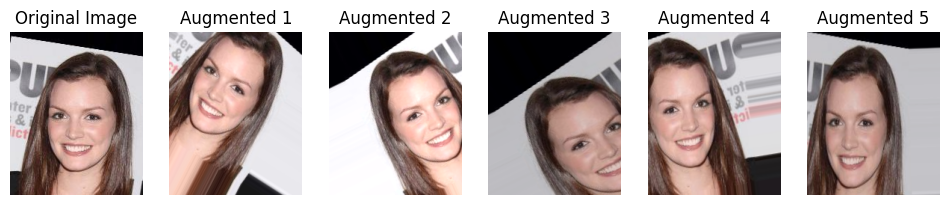

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import os

# Initialize ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    horizontal_flip=True,           # Random horizontal flips
    rotation_range=30,              # Random rotations within -30 to +30 degrees
    brightness_range=[0.8, 1.2],   # Random brightness adjustments
    zoom_range=0.2,                 # Random zooming
    width_shift_range=0.2,          # Random horizontal shifting
    height_shift_range=0.2          # Random vertical shifting
)

def augment_image(image_path, num_augmented_images=5):
    """
    Augments a single image and displays the original and augmented images.

    Parameters:
    - image_path (str): Path to the image file.
    - num_augmented_images (int): Number of augmented images to generate.
    """
    # Load the image
    image = Image.open(image_path)
    image_array = np.array(image)
    
    # Expand dimensions to fit the model input (batch_size, height, width, channels)
    image_array = np.expand_dims(image_array, axis=0)
    
    # Create an iterator for the augmented images
    generator = datagen.flow(image_array, batch_size=1)
    
    # Plot the original image and the augmented images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, num_augmented_images + 1, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis('off')
    
    for i in range(num_augmented_images):
        augmented_image = next(generator)[0].astype('uint8')
        plt.subplot(1, num_augmented_images + 1, i + 2)
        plt.title(f"Augmented {i+1}")
        plt.imshow(augmented_image)
        plt.axis('off')

    plt.show()

# Example usage
image_path = os.path.join(images_folder, '000506.jpg')  # Replace with an actual image path
augment_image(image_path)
